<a href="https://colab.research.google.com/github/abhishekchikane/YOLO/blob/master/VIMP_yolo_video2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [0]:
#cd ..

In [3]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

## If this gives error saying already exists. Just change the name of previous darknet folder.

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13221 (delta 0), reused 1 (delta 0), pack-reused 13218
Receiving objects: 100% (13221/13221), 11.92 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (9042/9042), done.


In [7]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content/darknet
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 all_in_one				    images.zip
'Blood Pressure Measuring Device.gslides'   notice_for_students.pdf
'Colab Notebooks'			   'Untitled spreadsheet.gsheet'
'Copy of darknet_old.zip'		    yolov3
'How to get started with Drive.pdf'	    YOLOv3_weight
 images


In [9]:
!pwd

/content/darknet


In [10]:
cd/content/darknet/src

/content/darknet/src


In [0]:
# First delete image.c file for bounding boxes.
!cp /mydrive/yolov3/image.c ./

In [12]:
cd ..

/content/darknet


In [13]:
cd ..

/content


In [14]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [15]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [16]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
#%cd ..
#upload()

/darknet


Saving street.jpg to street.jpg
saved file street.jpg


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn =

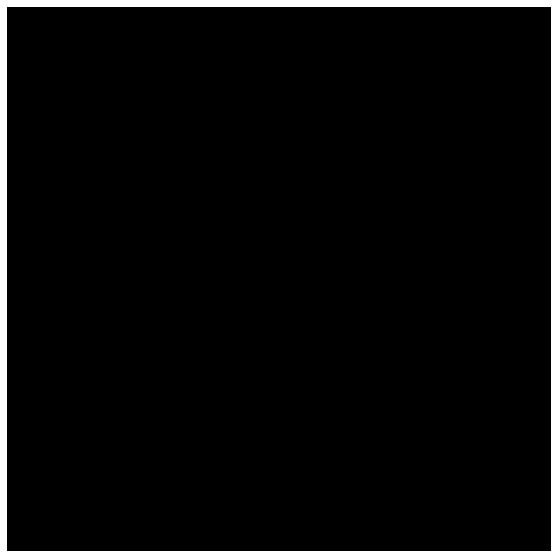

In [0]:
# make sure you are in the darknet folder to run the detections command!
#%cd darknet
#!./darknet detect cfg/yolov3.cfg yolov3.weights ../street.jpg
#imShow('predictions.jpg')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


 all_in_one				    images.zip
'Blood Pressure Measuring Device.gslides'   notice_for_students.pdf
'Colab Notebooks'			   'Untitled spreadsheet.gsheet'
'Copy of darknet_old.zip'		    yolov3
'How to get started with Drive.pdf'	    YOLOv3_weight
 images


In [0]:
!ls /mydrive

 all_in_one				    images.zip
'Blood Pressure Measuring Device.gslides'   notice_for_students.pdf
'Colab Notebooks'			    python.pdf
'Copy of darknet_old.zip'		   'Untitled spreadsheet.gsheet'
'How to get started with Drive.pdf'	    yolov3
 images					    YOLOv3_weight


In [0]:
!pwd

/content


In [0]:
cd/content/darknet

/content/darknet


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn =

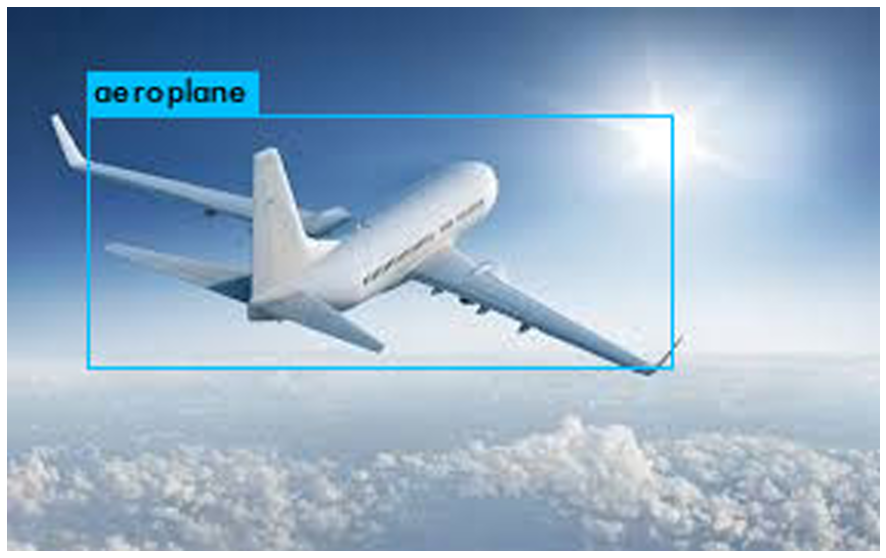

In [0]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
#%cd darknet
#!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
#imShow('predictions.jpg')

In [0]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
#download('predictions.jpg')

In [0]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
#!cp predictions.jpg /mydrive/images/detection1.jpg

In [0]:
# Training yolov3

In [18]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		   generate_train.py  obj.data	   obj.zip
backup_old1	   image.c	      obj.names    yolov3_custom.cfg
darknet53.conv.74  image_old.c	      obj_old.zip


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [20]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/0008c7ed0ef8ad164af5.jpg  
  inflating: data/obj/0008c7ed0ef8ad164af5.txt  
  inflating: data/obj/006a73368769d04aabcf.jpg  
  inflating: data/obj/006a73368769d04aabcf.txt  
  inflating: data/obj/009ac27ebff73364b431.jpg  
  inflating: data/obj/009ac27ebff73364b431.txt  
  inflating: data/obj/01170cb3bedf7898e6eb.jpg  
  inflating: data/obj/01170cb3bedf7898e6eb.txt  
  inflating: data/obj/012b28c2adb45a18ccfe.jpg  
  inflating: data/obj/012b28c2adb45a18ccfe.txt  
  inflating: data/obj/0146f8b6594d432cbedb.jpg  
  inflating: data/obj/0146f8b6594d432cbedb.txt  
  inflating: data/obj/01589ef76acc52dd5ed3.jpg  
  inflating: data/obj/01589ef76acc52dd5ed3.txt  
  inflating: data/obj/017de5b1c9009053e019.jpg  
  inflating: data/obj/017de5b1c9009053e019.txt  
  inflating: data/obj/0180ede0b0405c7016c6.jpg  
  inflating: data/obj/0180ede0b0405c7016c6.txt  
  inflating: data/obj/0236070af7981ca124f9.jpg  
  inflating: data/obj/0236070af7981ca124f9.txt  

In [0]:
!pwd

/content/darknet


In [0]:
# Configuring Files for Training

In [0]:
#####################################skip this cell
#download cfg to google drive and change its name
#!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

In [0]:
#######################################skip this cell
# to download to local machine (change its name to yolov3_custom.cfg once you download)
#download('cfg/yolov3.cfg')

In [0]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [0]:
!pwd

/content/darknet


In [0]:
# obj.names and obj.data

In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd ..

In [0]:
!pwd

/content/darknet


In [0]:
#cd /content/darknet

/content/darknet


In [0]:
# Generating train.txt

In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()

In [0]:
!python generate_train.py

In [25]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# Download pre-trained weights for the convolutional layers

In [0]:
# upload pretrained convolutional layer weights
#!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-04-16 18:21:30--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-04-16 18:21:30--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   436KB/s    in 5m 16s  

2020-04-16 18:26:48 (502 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# save pretrained weights in drive
#!cp darknet53.conv.74 /mydrive/yolov3/darknet53.conv.74

In [0]:
!cp /mydrive/yolov3/darknet53.conv.74 ./darknet53.conv.74

In [0]:
#Train Your Custom Object Detector!

In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.561000, GIOU: 0.557482), Class: 0.914452, Obj: 0.053925, No Obj: 0.000023, .5R: 0.666667, .75R: 0.000000, count: 3, class_loss = 0.708434, iou_loss = 0.572622, total_loss = 1.281056 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.673302, GIOU: 0.636409), Class: 0.998453, Obj: 0.196784, No Obj: 0.000217, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.161924, iou_loss = 0.092826, total_loss = 0.254750 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.610555, GIOU: 0.594782), Class: 0.820653, Obj: 0.490173, No Obj: 0.001526, .5R: 0.833333, .75R: 0.222222, count: 18, class_loss = 3.073363, iou_loss = 2.355952, total_loss = 5.429314 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.621071, GIOU: 0.620642), Class: 0.571050, Obj: 0.056739, No Obj: 0.000033, .5R: 1.000000, .75R: 0.250000, count: 

In [0]:
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.588719, GIOU: 0.568580), Class: 0.784728, Obj: 0.440263, No Obj: 0.001573, .5R: 0.833333, .75R: 0.166667, count: 6, class_loss = 0.980951, iou_loss = 0.827452, total_loss = 1.808402 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.618030, GIOU: 0.587030), Class: 0.559120, Obj: 0.385303, No Obj: 0.001363, .5R: 0.750000, .75R: 0.250000, count: 12, class_loss = 4.016652, iou_loss = 1.520558, total_loss = 5.537210 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.506940, GIOU: 0.409632), Class: 0.615587, Obj: 0.118230, No Obj: 0.000053, .5R: 0.250000, .75R: 0.250000, count: 4, class_loss = 1.330483, iou_loss = 1.170072, total_loss = 2.500555 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.646484, GIOU: 0.612164), Class: 0.804697, Obj: 0.534697, No Obj: 0.001081, .5R: 1.000000, .75R: 0.333333, count: 3

In [0]:
# Run Your Custom Object Detector!

In [26]:
!pwd

/content/darknet


In [27]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

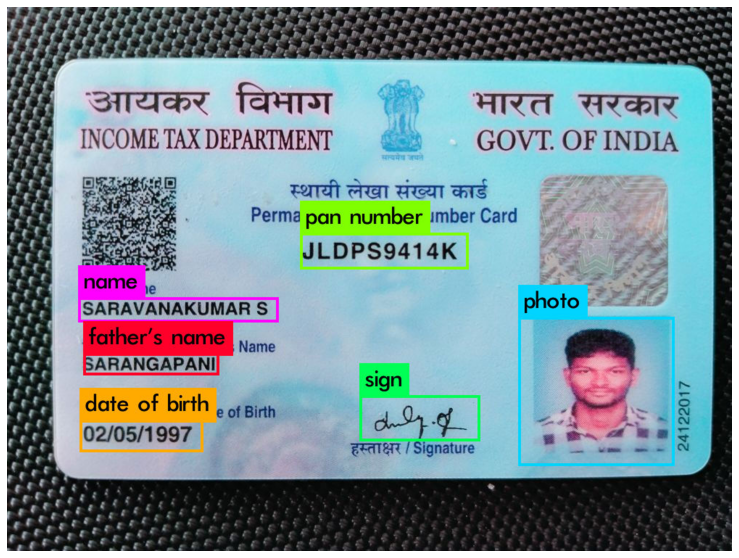

In [28]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/pan1.jpg -thresh 0.3
imShow('predictions.jpg')

In [29]:
!pwd

/content/darknet


In [0]:
cd ..

/content
